In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import SGD

In [3]:
df = pd.read_csv("D:/World-Stock-Prices-Dataset.csv")  
prices = df['Close'].values.reshape(-1, 1)

In [5]:
scaler = StandardScaler()
scaled_prices = scaler.fit_transform(prices)
X, y = [], []
for i in range(len(scaled_prices) - 10):
    X.append(scaled_prices[i:i+10])
    y.append(scaled_prices[i+10])
X, y = np.array(X), np.array(y)

In [7]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [9]:
model = Sequential([
    SimpleRNN(32, input_shape=(10, 1)),
    Dense(1)
])

C:\Users\indum\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
optimizer = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=optimizer)
model.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 1.0906
Epoch 2/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 1.0965
Epoch 3/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 1.0869
Epoch 4/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 1.0538
Epoch 5/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 1.0686
Epoch 6/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 1.0885
Epoch 7/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 1.0684
Epoch 8/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 1.0648
Epoch 9/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 1.0495
Epoch 10/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 1.0739
Epoch 11/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 1.1103
Epoch 12/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - loss: 1.0673
Epoch 13/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 1.0086
Epoch 14/20
7676/7676 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 1.0481
Epoch 15/20
767

1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


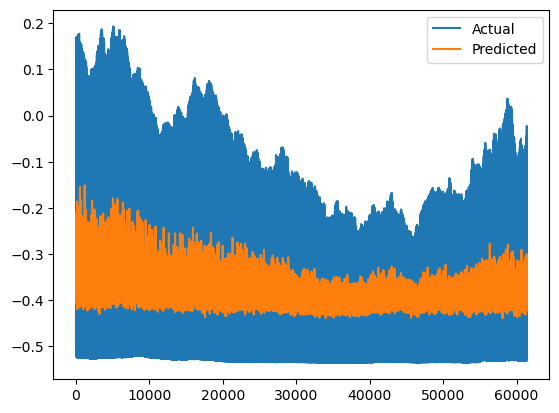

In [14]:
predictions = model.predict(X_test)
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()